<h1 style="text-align:center;">Predicting COVID-19 Contaction Based on Political Affiliation</h1>

<div style="text-align:center;">Scott Adams</div>
<div style="text-align:center;">Cameron Arnold</div>
<h2>Motivation</h2>
<p>
Along with the rest of the world, the United States has been ravaged by the COVID-19 pandemic. With the country's handling of the virus, it has contributed to over nine million cases and over two-hundred thousand deaths on its citizens [1]. Safety measures, such as mask-wearing and social-distancing, have been enforced over time, but many still do not believe this helps prevent virus contraction, or do not take it seriously. And though studies on face-masks protecting one against the virus have been done, proving them to be effective, there is somehow still doubt [2].  
</p>
<p>
Why such preventative measures are avoided should be questioned. There may be many factors contributing to this, but one specific component to focus on is politicism. Pew Research Center has conducted a recent survey of 9,220 respondents from August through September of 2020, asking Democrats and Republicans how the pandemic has "affected them negatively [3]." Based on their results, both groups had responded with many answers containing key phrases, such as "family", "work", "friend", and others, but also "mask". Ten percent of the democratic group responded with "mask", while nineteen percent of the Republican side answered with this phrase. Only a third of those with the phrase in their response expressed concern about "other people refusing to wear them." The remaining were out of complaint.
</p>
<p>
The motivation of this study is to identify the relationship between COVID-19 contraction and political party affiliation in the United States. Other features, such as age, race, and gender will be used in combination with one's political party choice. The goal is to train a model that will predict whether or not one will contract this virus based on these mentioned features. We have focused on data from September 1, 2020 to November 1, 2020.
</p>

[1] https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days  
[2] https://www.ucsf.edu/news/2020/06/417906/still-confused-about-masks-heres-science-behind-how-face-masks-prevent  
[3]https://www.pewresearch.org/fact-tank/2020/10/29/both-republicans-and-democrats-cite-masks-as-a-negative-effect-of-covid-19-but-for-very-different-reasons/  


<h3>Import dependencies</h3>
<ul>
    <li><code>classification_report</code> - report on precision, recall, fscore</li>
    <li><code>cleaner</code> - local data-cleaning package for running sql sanitizing</li>
    <li><code>f1_score</code> - system accuracy checking</li>
    <li><code>LogisticRegression</code> - train LR model</li>
    <li><code>MinMaxScaler</code> - feature scaling</li>
    <li><code>MLPClassifier</code> - train NN model</li>
    <li><code>numpy</code> - matrix operations</li>
    <li><code>pandas</code> - data analysis and visualization</li>
    <li><code>pyplot</code> - graphing data</li>
    <li><code>sys</code> - adding <code>cleaner</code> package to local path</li>
    <li><code>stats</code> - check correlation between features and classifier (Pearson's coefficient)</li>
    <li><code>train_test_split</code> - split data for training and testing</li>
</ul>

In [90]:
import pandas as pd
import numpy as np

import sys
sys.path.insert(0, './cleaner')
import cleaner

from matplotlib import pyplot
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import f1_score
from scipy import stats

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# useful dictionaries for quickly testing variations of features on learning algorithms
# these represent the columns in our cleaned data
gender_features = {
    'm':'male', 
    'f':'female'
}

gender_race_features = {
    'wm':      'white_male',
    'wf':    'white_female',
    'bm':      'black_male',
    'bf':    'black_female',
    'hm':   'hispanic_male',
    'hf': 'hispanic_female',
    'am':      'asian_male',
    'af':   'asian_female'
}

race_ratio_features = {
    'wr': 'white_ratio',
    'br': 'black_ratio',
    'hr': 'hispanic_ratio',
    'ar': 'asian_ratio'
}

party_ratio_features = {
    'rr': 'republican_ratio',
    'dr': 'democrat_ratio'
}
# preview limit for pandas dataframes
ROW_LIMIT = 25

<h2>Analysing Original Data</h2>
<p>
Three datasets have been obtained for this study, separated by COVID-19 cases and deaths in the U.S., political party affiliation, and population demographics. As an official first step of this study, upon loading data, it has been checked for any sensitive information, such as names. No private data was included in the original datasets.
</p>
<p>
To view each original dataset, our <code>cleaner</code> library references the file paths of these datasets. Accessing its properties, <code>DIRTY_CASES</code>, <code>DIRTY_PARTY</code>, or <code>DIRTY_DEMS</code>, a CSV file can then be read with <code>pandas</code> <code>read_csv</code> function. 
</p>
<div>
All original datasets are read like so:
    <ul>
        <li>
            <code>pd.read_csv(cleaner.DIRTY_CASES)</code> - reads COVID-19 cases dataset
        </li>
        <li>
            <code>pd.read_csv(cleaner.DIRTY_PARTY)</code> - reads political party affiliation dataset
        </li>
        <li>
            <code>pd.read_csv(cleaner.DIRTY_DEMS)</code> - reads population demographics
        </li>
    </ul>
</div>

<h3>COVID-19 cases per county in the U.S.</h3>
<div>Obtained from <a href=https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset)>Kaggle</a>, this data contains the following features:
    <ul>
        <li>date - date of reported cases and deaths in a county</li>
        <li>county - county reported on</li>
        <li>state - state of the county</li>
        <li>fips - unique county identifier</li>
        <li>cases - COVID19 cases in a county on specified date</li>
        <li>death - COVID19 deats in a county on specified date</li>
    </ul>
</div>
<p>The set reports case and death count from January 1, 2020 through November 1, 2020:</p>

In [2]:
original_cases = pd.read_csv(cleaner.DIRTY_CASES)
original_cases.head(ROW_LIMIT)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


<h3>Political party affiliation by per county in the U.S.</h3>
<div>Obtained from <a href=https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)>Harvard University</a>, this data contains the following features:
    <ul>
        <li>year - year of primary election voting in county</li>
        <li>state - state of the county</li>
        <li>state_po - state abbreviation</li>
        <li>county - county reported on</li>
        <li>fips - unique county identifier</li>
        <li>office - office of running candidate (president)</li>
        <li>candidate - name of candidate running for office</li>
        <li>party - candidate's party affiliation</li>
        <li>candidatevotes - votes from county residents affiliated with party</li>
        <li>totalvotes - total votes from county</li>
        <li>version - date of data input</li>
    </ul>
</div>
<p>The set reports county-level voting information from 2000 to 2016:</p>

In [3]:
original_party = pd.read_csv(cleaner.DIRTY_PARTY)
original_party.head(25)

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203
3,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,20191203
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,20191203
5,2000,Alabama,AL,Baldwin,1003.0,President,George W. Bush,republican,40872.0,56480,20191203
6,2000,Alabama,AL,Baldwin,1003.0,President,Ralph Nader,green,1033.0,56480,20191203
7,2000,Alabama,AL,Baldwin,1003.0,President,Other,NaN,578.0,56480,20191203
8,2000,Alabama,AL,Barbour,1005.0,President,Al Gore,democrat,5188.0,10395,20191203
9,2000,Alabama,AL,Barbour,1005.0,President,George W. Bush,republican,5096.0,10395,20191203


<h3>Population Demographics per county in the U.S.</h3>
<div>Obtained from the <a href="https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-detail.html">Census Bureau</a>, some of this datasets features are described below:
    <ul>
        <li>sumlev - geographic summary level of a county</li>
        <li>state - unique identifier of the countys state (fips code)</li>
        <li>county - unique identifier of county (fips code)</li>
        <li>cntyname - county name</li>
        <li>year - key for countys estimated population by date (see data field key in link below)</li>
        <li>agegrp - key for describing age group range in a county (see data field key in link below)</li>
        <li>tot_pop - countys total population</li>
        <li>tot_male - total male population of county</li>
        <li>tot_female - total female population of county</li>
    </ul>
    <p>There are well over thirty more features to describe, which consist of combinations of race and gender. These can be seen in the generated dataset by <code>pandas</code>, and can be described in the Census Bureas <a href="https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/cc-est2019-alldata.pdf">data key</a>.
</div>
<p>The set reports county demographics from April 2010 to July 2019:</p>

In [4]:
original_dems = pd.read_csv(cleaner.DIRTY_DEMS)
original_dems.head(25)

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,607,538,57,48,26,32,9,11,19,10
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,...,77,56,9,5,4,1,0,0,2,1
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,...,64,66,2,3,2,7,2,3,2,0
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,...,51,57,13,7,5,5,2,1,1,1
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,...,48,44,7,5,0,2,2,1,3,1
5,50,1,1,Alabama,Autauga County,1,5,3080,1539,1541,...,62,34,2,4,2,3,0,1,1,1
6,50,1,1,Alabama,Autauga County,1,6,3157,1543,1614,...,54,39,5,3,0,0,2,0,5,2
7,50,1,1,Alabama,Autauga County,1,7,3330,1594,1736,...,56,53,4,6,0,2,0,1,2,1
8,50,1,1,Alabama,Autauga County,1,8,4157,2004,2153,...,50,37,2,4,4,2,0,2,1,2
9,50,1,1,Alabama,Autauga County,1,9,4086,1974,2112,...,47,34,3,1,2,3,0,0,1,1


<h2>Cleaning Data</h2>
<p>
    Our cleaning involved mapping all sets by county FIPS codes and much more. Getting a final and consistent dataset needed a bit of analyzation. One issue here is that each dataset contains a county column, but there is inconsistency in how they are represented. For example, two sets county columns contain "Autauga," and the other contains "Autauga County," while only one also contains a county-id column. This was only one of the several problems. The remaining will be described in each section of where a cleaned dataset can be displayed. 
</p>
<p>
The overall cleaning process is supported by <code>SQL</code> scripts. These scripts have been automated with our <code>Python</code> <code>cleaner</code> package.
</p>
<div>Sources:
    <ul> SQL scripts
        <li><code>cleaner/data_to_clean/cases_by_county/clean_cases_by_county.sql</code></li>
        <li><code>cleaner/data_to_clean/demographics_by_county/clean_dems_by_county.sql</code></li>
        <li><code>cleaner/data_to_clean/politics_by_county/clean_politics_by_county.sql</code></li>
        <li><code>cleaner/data_to_clean/final_table/clean_data.sql</code></li>
    </ul>
    <ul> Python scripts
        <li><code>cleaner/config/CONFIG.py</code></li>
        <li><code>cleaner/paths/PATHS.py</code></li>
        <li><code>cleaner/cleaner.py</code></li>
    </ul>
</div>

<h3>Cleaning COVID-19 cases</h3>
<div>Issues with original data:
    <ul>
        <li>Counties are repeated</li>
        <li>Deaths, All Dates, States aren't needed</li>
        <li>Empty/Wrong FIPS</li>
    </ul>
</div>
<p>
This data was cleaned in order to rectify these issues with the SQL scripts. To remove the repeated counties, the maximum case count of each county was selected. This is because the dataset never removes a case value, but only increments it when a new case appears, therefore the max value is the total cases. All dates after a specified threshold were chosen. Deaths and states were dropped.
</p>

In [5]:
cleaner.clean_cases()
cleaned_cases = pd.read_csv(cleaner.CLEANED_CASES_SRC)
cleaned_cases.head(ROW_LIMIT)

,fips,state,county,county_date,cases
0,1001,Alabama,Autauga,2020-11-01,2173
1,1003,Alabama,Baldwin,2020-11-01,6966
2,1005,Alabama,Barbour,2020-11-01,1061
3,1011,Alabama,Bullock,2020-11-01,655
4,1015,Alabama,Calhoun,2020-11-01,4892
5,1021,Alabama,Chilton,2020-11-01,1946
6,1029,Alabama,Cleburne,2020-11-01,590
7,1033,Alabama,Colbert,2020-11-01,2307
8,1035,Alabama,Conecuh,2020-10-31,577
9,1037,Alabama,Coosa,2020-11-01,223


<h3>Cleaning political party affiliations</h3>
<div>Issues with original data:
  <ul>
    <li>Years are not always relevant</li>
    <li>Office column is always the same</li>
    <li>State_po is redundant</li>
    <li>Multiple entries for counties</li>
  </ul>
</div>
<p>
This data was cleaned in order to rectify these issues with SQL scripts. The years before 2016 were removed because we are trying to determine the current state of partisanship in America, and 2020 election data wasn't available yet. The office column is always "President", so it is redundant. The state_po column is abbreviations for the state and therefore redundant. There are multiple entries for counties/fips because of the different parties running for president. Each county had 1-4 party identifiers, republican, democrat, green, NA. All except democrat was removed, and from democrat/total_votes we can query the republican ratio and also query who won the election.
</p>


In [6]:
cleaner.clean_party()
cleaned_party = pd.read_csv(cleaner.CLEANED_PARTY_SRC)
cleaned_party.head(ROW_LIMIT)

,fips,state,county,republican_ratio,democrat_ratio,political_affiliation
0,1001,Alabama,Autauga,0.76,0.24,republican
1,1003,Alabama,Baldwin,0.81,0.19,republican
2,1005,Alabama,Barbour,0.53,0.47,republican
3,1007,Alabama,Bibb,0.79,0.21,republican
4,1009,Alabama,Blount,0.92,0.08,republican
5,1011,Alabama,Bullock,0.25,0.75,democrat
6,1013,Alabama,Butler,0.57,0.43,republican
7,1015,Alabama,Calhoun,0.72,0.28,republican
8,1017,Alabama,Chambers,0.58,0.42,republican
9,1019,Alabama,Cherokee,0.86,0.14,republican


<h3>Cleaning demographics</h3>
<div>Issues with original data:
  <ul>
    <li>Too many redundant columns</li>
    <li>FIPS was split into state and county codes instead of one number</li>
    <li>Same fips entries for different age groups/years</li>
  </ul>
</div>
<p>
This data was cleaned with SQL scripts. The redundant columns were fixed by doing research on which races make up the majority of america. Black, White, Asian and Hispanic are the most relevant to the data and could potentially have the most impact. This is why they were included. FIPS was created from combining State FIPS code and County FIPS code because in this data table they were separate. All years before the most recent were removed. All age groups under the voting age were removed. The remaining age group population values were summed up to get the population total that can vote in a county.

In [7]:
cleaner.clean_dems()
cleaned_dems= pd.read_csv(cleaner.CLEANED_DEMS_SRC)
cleaned_dems.head(ROW_LIMIT)

,fips,state,county,population,male,female,white_male,white_female,black_male,black_female,hispanic_male,hispanic_female,asian_male,asian_female
0,1001,Alabama,Autauga County,17748,8744,9004,6588,6650,1832,2037,323,258,133,148
1,1003,Alabama,Baldwin County,59850,29564,30286,25096,25746,3427,3347,1915,1599,342,496
2,1005,Alabama,Barbour County,8437,5098,3339,2261,1455,2697,1810,309,159,22,18
3,1007,Alabama,Bibb County,7777,4545,3232,2896,2566,1586,622,175,103,9,3
4,1009,Alabama,Blount County,17150,8606,8544,8277,8230,178,112,1121,888,19,28
5,1011,Alabama,Bullock County,3574,2166,1408,635,271,1462,1077,204,162,4,5
6,1013,Alabama,Butler County,5902,2702,3200,1346,1402,1244,1709,46,36,87,59
7,1015,Alabama,Calhoun County,36412,17806,18606,13289,13376,3968,4586,897,721,163,247
8,1017,Alabama,Chambers County,10065,4903,5162,2655,2656,2043,2367,161,106,128,77
9,1019,Alabama,Cherokee County,6805,3420,3385,3170,3192,173,121,76,57,7,8


<h3>Joining cleaned data</h3>
<p>With all datasets cleaned, the final dataset was produced below, and used throughout our study. Here, we have calculated political party and race ratios per county. We have also determined a COVID-19 risk rate per county: <code>population / cases</code>. If the risk is greater than 15%, the risk_classification is 1, and otherwise 0.</p>

In [8]:
cleaner.finalize()
cleaned_data = pd.read_csv(cleaner.FINAL_SRC)
cleaned_data.head(ROW_LIMIT)

,FIPS,state,county,population,male,female,white_male,white_female,black_male,black_female,...,democrat_ratio,political_affiliation,cases,percent_risk,risk_classification,male_ratio,white_ratio,black_ratio,hispanic_ratio,asian_ratio
0,10003,Delaware,New Castle County,185145,92032,93113,58897,57834,23567,25814,...,0.62,democrat,13259,7.0,0,0.50,0.63,0.27,0.12,0.07
1,10005,Delaware,Sussex County,54497,27294,27203,21303,20961,4423,4517,...,0.37,republican,8170,15.0,0,0.50,0.78,0.16,0.13,0.02
2,1001,Alabama,Autauga County,17748,8744,9004,6588,6650,1832,2037,...,0.24,republican,2173,12.0,0,0.49,0.75,0.22,0.03,0.02
3,1003,Alabama,Baldwin County,59850,29564,30286,25096,25746,3427,3347,...,0.19,republican,6966,12.0,0,0.49,0.85,0.11,0.06,0.01
4,1005,Alabama,Barbour County,8437,5098,3339,2261,1455,2697,1810,...,0.47,republican,1061,13.0,0,0.60,0.44,0.53,0.06,0.00
5,1011,Alabama,Bullock County,3574,2166,1408,635,271,1462,1077,...,0.75,democrat,655,18.0,1,0.61,0.25,0.71,0.10,0.00
6,1015,Alabama,Calhoun County,36412,17806,18606,13289,13376,3968,4586,...,0.28,republican,4892,13.0,0,0.49,0.73,0.23,0.04,0.01
7,1021,Alabama,Chilton County,13618,6779,6839,5855,5866,746,813,...,0.16,republican,1946,14.0,0,0.50,0.86,0.11,0.10,0.01
8,1029,Alabama,Cleburne County,4249,2145,2104,2047,2005,62,67,...,0.10,republican,590,14.0,0,0.50,0.95,0.03,0.03,0.00
9,1033,Alabama,Colbert County,16125,7971,8154,6422,6435,1324,1464,...,0.29,republican,2307,14.0,0,0.49,0.80,0.17,0.03,0.01


<h2>Visualizing Data</h2>
<p>Our main focus is to find correlation between political party affiliation and risk of COVID-19 contraction. The graphs below appear to show some relationship between party affiliation and risk rate. From September to the first of November, as the republican ratio increases for counties, percent risk increases, too. The opposite can be seen when focusing on county democrat ratio.</p>

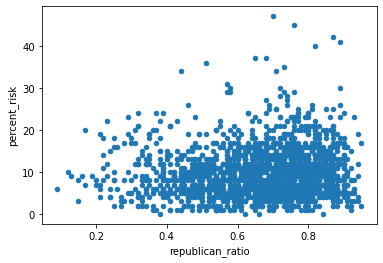

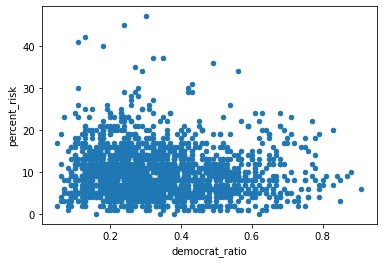

In [17]:
x_reps = 'republican_ratio'
x_dems = 'democrat_ratio'
y = 'percent_risk'
cleaned_data[[x_reps,y]].plot(x=x_reps,y=y,kind='scatter')
cleaned_data[[x_dems,y]].plot(x=x_dems,y=y,kind='scatter')

<h2>Training a Model</h2>
<p>
Determining a relationship between political status and COVID-19 risk rates may seem likely with the graphs shown above, however, our original model prediction showed otherwise. Using only a logistic regression model originally, its accuracy was fairly low. Having trouble finding the best feature combinations to find the highest accuracy, a set of functions were created to find this accuracy by testing both a logistic regression model and neural network, using all combindations of features. 
</p>

<h3><code>train_on</code> and <code>train_on_and_score</code></h3>
<p>
<code>train_on</code> was created to take some set of features and the desired model-type to train on those features; state, county, cases, and percent_risk columns are not passed to the model. This function initially loads our cleaned, joined data, copies it, performs feature scaling, and splits the copied data into training and testing sets. After training the model, the function returns all training and testing data, as well as the trained model. This function is called on its own, but has a key roll in being called by our second function, <code>train_on_and_score</code>, which determines the fscore of the model; the fscore and features used to train the model are returned by this function.
</p>

In [64]:
def train_on(additional_features, model):
    # load cleaned data
    cleaned_data = pd.read_csv(cleaner.FINAL_SRC)
    copied_clean_data = cleaned_data.copy()

    # replace political affiliation (string) with 0-rep, 1-dem
    copied_clean_data = copied_clean_data.replace('republican', 0)
    copied_clean_data = copied_clean_data.replace('democrat', 1)
    
    # drop un-needed columns
    copied_clean_data = copied_clean_data.drop(['state','county','cases','percent_risk'], axis=1)
    
    # default features with additional chosen features
    X_default_features = []
    x_selected = X_default_features+additional_features
    copied_clean_data = copied_clean_data[x_selected+['risk_classification']]
    
    # feature_scale everything but FIPS party_affilication:
    features_to_scale = x_selected
    min_max_scaler = MinMaxScaler()
    copied_clean_data[features_to_scale] = min_max_scaler.fit_transform(copied_clean_data[features_to_scale])
   
    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        copied_clean_data.drop(['risk_classification'],axis=1),
        copied_clean_data['risk_classification'],
        test_size=0.25,
        train_size=0.75)
    
    # train and fit model
    clf = model.fit(X_train,y_train)
    return clf, x_selected, X_test, y_test, X_train, y_train


def train_on_and_score(additional_features, model, score_avg=None):
    clf, x_selected, X_test, y_test, X_train, y_train = train_on(additional_features, model)
    # calculate prec, rec, fscore
    y_pred = clf.predict_proba(X_test)[:,0] > .8
    return f1_score(y_test, y_pred, average=score_avg), x_selected

<h3><code>top_fscores</code></h3>
<p>
Finding the best combination of features for a good fscore posed a challenge for us, so <code>top_fscores</code> was created to solve this challenge. This function takes a model instance, passing it to our <code>train_on_and_score</code> function along with some set of features. We wanted to test all combinations of features since previous training persisted in an extremely low fscore, unable to find the right set of features to train the model. With this function, a set amount of features are first joined together in one list. We have decided to only use only features of race and party, as combining others seemed to produce too much noise, likely contributing to our original lower fscore.
</p>

<p>
<code>top_fscores</code> creates all possible combinations of our selected features, but removes duplicates to maintain shorter completion time of training a model. Going through each possible combination, the desired model and feature set are passed to <code>train_on_and_score</code>, and its return values, <code>f_score</code> and <code>features_used</code> are placed in a dictionary, added to a list for tracking. Once all possible fscores are computed, this list is then sorted in descending order and converted to a <code>pandas</code> <code>DataFrame</code>. Lastly, the top ten scores from the <code>DataFrame</code> are plotted.
</p>

In [80]:
def top_fscores(model):
    from functools import reduce
    import itertools

    feature_values = [race_ratio_features.values(), party_ratio.values()]
    all_additional_features = reduce(lambda a,b: list(a)+list(b), feature_values)

    all_features_combinations = []
    for r in range(len(all_additional_features)):
        all_features_combinations.append(
            list(set(itertools.combinations(all_additional_features,r+1)))
        )

    all_feature_f1_score_combinations = []
    for curr_combinations in all_features_combinations:
        for combination in curr_combinations:
            f_score, features_used = train_on_and_score(list(combination), model,score_avg='macro')
            features_used = ''.join(list(map(lambda f: f[0]+f[f.find('_')+1]+',', features_used)))
            __data__ = {'features': features_used, 'f_score':f_score}
            all_feature_f1_score_combinations.append(__data__)

    all_feature_f1_score_combinations = sorted(
        all_feature_f1_score_combinations,
        key = lambda i: i['f_score'],
        reverse=True
    )
    features_f1_scores_df = pd.DataFrame(all_feature_f1_score_combinations)
    features_f1_scores_df.head(10).plot(x='features',y='f_score',kind='scatter',rot=45)
    return features_f1_scores_df

<h2>Reviewing top Fscores</h2>
<p>
Two graphs are shown below, describing a features used to train a model versus a models fscore. Beneath each graph, a classification table has been computed to further detail the models precision and recall. The first graph shows is of a logistic regression model and the second, a neural network; these have been created to compare, hoping to find some understanding as to why our original fscore was low.
</p>

<h4>Key</h4>
<div>A graphs x-axis shows the features used to train a model, but are too long to display without overlapping, so these were abbreviated as the following:
    <ul>
      <li>wr - white_ratio</li>
      <li>br - black_ratio</li>
      <li>hr - hispanic_ratio</li>
      <li>ar - asian_ratio</li>
      <li>rr - republican_ratio</li>
      <li>dr - democrat_ratio</li>
    </ul>
</div>

<h4>Top ten fscores of logistic regression models</h4>

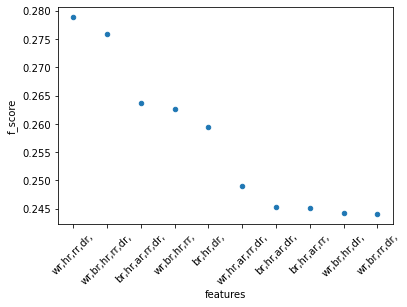

In [81]:
features_f1_scores_df = top_fscores(model=LogisticRegression(solver='lbfgs'))

<p>Using the features that gave the highest fscore, a logistic regression model was trained owith 'wr', 'hr', 'rr', and 'dr':

In [82]:
rrf = race_ratio_features
pr = party_ratio_features

selected = [rrf['wr'],rrf['hr'],pr['dr'],pr['rr']]
clf, x_selected, X_test, y_test, X_train, y_train = train_on(selected, LogisticRegression(solver='lbfgs'))
y_pred = clf.predict_proba(X_test)[:,0] > .8
print(classification_report(y_test,y_pred,zero_division=True))

              precision    recall  f1-score   support

           0       0.75      0.18      0.29       387
           1       0.12      0.66      0.21        67

    accuracy                           0.25       454
   macro avg       0.44      0.42      0.25       454
weighted avg       0.66      0.25      0.28       454



<h4>Top ten fscores of neural networks</h4>

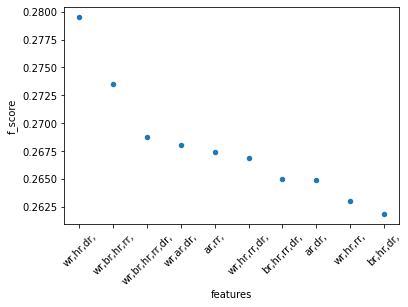

In [83]:
features_f1_scores_df = top_fscores(model=MLPClassifier(max_iter=2000))

<p>Using the features that gave the highest fscore, a neural network was trained with 'wr', 'hr', and 'dr':

In [84]:
selected = [rrf['wr'],rrf['hr'],pr['dr']]
clf, x_selected, X_test, y_test, X_train, y_train = train_on(selected, MLPClassifier(max_iter=2000))
y_pred = clf.predict_proba(X_test)[:,0] > .8
print(classification_report(y_test,y_pred,zero_division=True))

              precision    recall  f1-score   support

           0       0.65      0.17      0.27       378
           1       0.12      0.55      0.19        76

    accuracy                           0.23       454
   macro avg       0.39      0.36      0.23       454
weighted avg       0.56      0.23      0.26       454



<h2>Conclusions</h2>
<p>
Based on the graphs above, the highest fscore for both model types are very close, around 0.28, but still very low. Another oddity here is that when more features are added, the score decreases at times. Looking more into the relationship of our data, if any, we have also used Pearson's coefficient to find any correlation between political party affiliation and COVID-19 contraction risk:
</p>

In [97]:
X_rr = cleaned_data['republican_ratio']
X_dr = cleaned_data['democrat_ratio']
y_rc = cleaned_data['risk_classification']


print(f'Relationship between republican_ratio and risk_classification: {stats.pearsonr(X_rr, y_rc)[0]}')
print(f'Relationship between democrat_ratio and risk_classification: {stats.pearsonr(X_dr, y_rc)[0]}')

Relationship between republican_ratio and risk_classification: 0.033292868043946724
Relationship between democrat_ratio and risk_classification: -0.033292868043946724


<p>
Looking at the coefficent for either relationship of risk_classification and party-type, the coefficient is very close to zero. This suggests that there is no relationship between political party affiliation and COVID-19 contraction. It is very possible that a relationship may exist, but our current data might not support our research. Further study is required. 
</p>